# Support Vector Machine

### 0. 패키지 불러오기

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# 우분투 한글깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

# 윈도우 한글깨짐 현상 해결
matplotlib.rc("font", family = "Malgun Gothic")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

### 1. 데이터 구성하기

In [2]:
df_raw = pd.read_excel('model2_dataset.xlsx')
df_raw.head()

,customer_id,insu_risk_expense,gender,age,bmi,waist,bp_min,bp_max,bt_chol,bt_gluc,bt_rgpt,bt_sgot,bt_sgpt,risk
0,C117780,194376.0,M,50,23.939481,83.0,85,130,252.0,87.0,42.0,18.0,19.0,0
1,C117780,-1869370.0,M,50,23.939481,83.0,85,130,252.0,87.0,42.0,18.0,19.0,1
2,C121178,-913949.0,M,30,24.816327,86.0,80,125,210.0,96.0,134.0,16.0,27.0,1
3,C116605,-1813374.0,M,50,26.259585,88.0,80,130,223.0,114.0,196.0,26.0,23.0,1
4,C129391,-4495124.0,F,35,19.227688,72.0,80,120,157.0,84.0,10.0,11.0,8.0,1


In [3]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

customer_id             0
insu_risk_expense       0
gender                  0
age                     0
bmi                     0
waist                   0
bp_min                  0
bp_max                  0
bt_chol              1097
bt_gluc              1097
bt_rgpt              2919
bt_sgot              2823
bt_sgpt              1097
risk                    0
dtype: int64

In [4]:
df_raw.dropna(inplace=True)

In [5]:
df_raw.drop(['customer_id'], axis=1, inplace=True)

In [6]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,insu_risk_expense,age,bmi,waist,bp_min,bp_max,bt_chol,bt_gluc,bt_rgpt,bt_sgot,bt_sgpt,risk,gender_F,gender_M
0,194376.0,50,23.939481,83.0,85,130,252.0,87.0,42.0,18.0,19.0,0,0,1
1,-1869370.0,50,23.939481,83.0,85,130,252.0,87.0,42.0,18.0,19.0,1,0,1
2,-913949.0,30,24.816327,86.0,80,125,210.0,96.0,134.0,16.0,27.0,1,0,1
3,-1813374.0,50,26.259585,88.0,80,130,223.0,114.0,196.0,26.0,23.0,1,0,1
4,-4495124.0,35,19.227688,72.0,80,120,157.0,84.0,10.0,11.0,8.0,1,1,0


In [7]:
df_raw_y = df_raw_dummy['risk']
df_raw_x = df_raw_dummy.drop(['risk', 'insu_risk_expense'], axis=1, inplace=False)

In [8]:
df_raw_x.head()

,age,bmi,waist,bp_min,bp_max,bt_chol,bt_gluc,bt_rgpt,bt_sgot,bt_sgpt,gender_F,gender_M
0,50,23.939481,83.0,85,130,252.0,87.0,42.0,18.0,19.0,0,1
1,50,23.939481,83.0,85,130,252.0,87.0,42.0,18.0,19.0,0,1
2,30,24.816327,86.0,80,125,210.0,96.0,134.0,16.0,27.0,0,1
3,50,26.259585,88.0,80,130,223.0,114.0,196.0,26.0,23.0,0,1
4,35,19.227688,72.0,80,120,157.0,84.0,10.0,11.0,8.0,1,0


In [9]:
df_train_x, df_test_x,df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
print("train data size : {}".format(df_train_x.shape))
print("test data size : {}".format(df_test_x.shape))
print("train data size : {}".format(df_train_y.shape))
print("test data size : {}".format(df_test_y.shape))

train data size : (1284, 12)
test data size : (551, 12)
train data size : (1284,)
test data size : (551,)


In [10]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled_x = scaler.fit_transform(df_raw_x)
df_scaled_x = pd.DataFrame(df_scaled_x, columns=v_feature_name)
df_scaled_x.head()

,age,bmi,waist,bp_min,bp_max,bt_chol,bt_gluc,bt_rgpt,bt_sgot,bt_sgpt,gender_F,gender_M
0,0.412893,0.083810,0.227569,1.181952,1.190383,1.571354,-0.192367,0.023456,-0.578876,-0.435988,-0.638975,0.638975
1,0.412893,0.083810,0.227569,1.181952,1.190383,1.571354,-0.192367,0.023456,-0.578876,-0.435988,-0.638975,0.638975
2,-1.627937,0.432417,0.609750,0.303933,0.606862,0.352180,0.491875,2.647571,-0.769668,0.026328,-0.638975,0.638975
3,0.412893,1.006211,0.864538,0.303933,1.190383,0.729543,1.860360,4.415996,0.184294,-0.204830,-0.638975,0.638975
4,-1.117730,-1.789452,-1.173765,0.303933,0.023341,-1.186302,-0.420447,-0.889280,-1.246650,-1.071672,1.565007,-1.565007


서포트 벡터 머신의 경우 피쳐의 스케일링이 꼭 필요하므로 스케일링하였다.

In [11]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_scaled_x, df_raw_y, test_size=0.3, random_state=1234)

print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(1284, 12)
train data Y size :(1284,)
test data X size :(551, 12)
test data Y size :(551,)


### 2. 모델 생성 - Parameter 조정 및 평가

In [12]:
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set:{:.3f}".format(svm_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(svm_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:0.620
Accuracy on test set:0.517


In [13]:
svm_uncustomized

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
# C: 규제에 대한 강도

train_accuracy = []
test_accuracy=[]

para_c=[0.5 * c for c in range(1,11)]

for v_C in para_c:
    svm = SVC(C=v_C,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))

df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.5,0.594,0.492
1,1.0,0.620,0.517
2,1.5,0.643,0.512
3,2.0,0.663,0.521
4,2.5,0.677,0.519
5,3.0,0.694,0.517
6,3.5,0.703,0.525
7,4.0,0.715,0.514
8,4.5,0.723,0.519
9,5.0,0.724,0.514


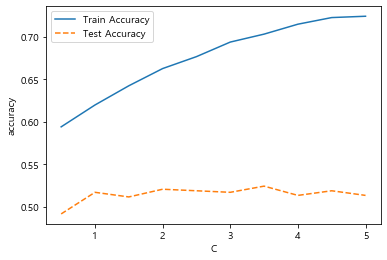

In [15]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_c, test_accuracy,linestyle="--",label="Test Accuracy")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend()

C가 늘어날수록 train 정확도와 test 정확도의 차이가 늘어난다. 따라서 C를 따로 설정하지 않는다.

In [18]:
# gamma: train셋이 미치는 영향의 범위

train_accuracy=[]
test_accuracy=[]

para_gamma = [gamma*0.05 for gamma in range(1,11)]

for v_gamma in para_gamma:
    svm = SVC(gamma=v_gamma, random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))
    

df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"]=para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["testAccuracy"] = test_accuracy

df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,testAccuracy
0,0.05,0.587,0.495
1,0.10,0.642,0.514
2,0.15,0.695,0.541
3,0.20,0.738,0.528
4,0.25,0.777,0.526
5,0.30,0.811,0.525
6,0.35,0.830,0.526
7,0.40,0.859,0.528
8,0.45,0.873,0.528
9,0.50,0.892,0.537


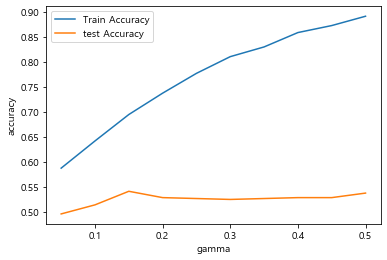

In [19]:
plt.plot(para_gamma,train_accuracy,linestyle="-",label ="Train Accuracy")
plt.plot(para_gamma,test_accuracy,linestyle="-",label ="test Accuracy")
plt.xlabel("gamma")
plt.ylabel("accuracy")
plt.legend()

gamma를 따로 설정하지 않는 것이 test 정확도도 높고 train 정확도와의 차이도 가장 적다.따라서 gamma를 따로 설정하지 않는다.

### 3. 최종 모델 선정

In [22]:
svc_final = SVC(random_state=1234)
svc_final.fit(df_train_x,df_train_y)

print("Accuracy on training set: 0.620 >>> {:.3f}".format(svc_final.score(df_train_x,df_train_y)))
print("Accuracy on test set: 0.517 >>> {:.3f}".format(svc_final.score(df_test_x,df_test_y)))

Accuracy on training set: 0.620 >>> 0.620
Accuracy on test set: 0.517 >>> 0.517


In [38]:
svc_final

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
y_pred = svc_final.predict(df_test_x)
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Confusion matrix:
[[212  48]
 [224  67]]


In [23]:
estimator = SVC(random_state=1234)
param_grid={"C":para_c,"gamma":para_gamma}

grid_rf=GridSearchCV(estimator,param_grid,scoring="accuracy",n_jobs=-1)
grid_rf.fit(df_train_x,df_train_y)
print("best estimator model:\n{}".format(grid_rf.best_estimator_))
print("\nbest parameter:\n{}".format(grid_rf.best_params_))
print("\nbest score:\n{}".format(grid_rf.best_score_.round(4)))

best estimator model:
SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

best parameter:
{'C': 0.5, 'gamma': 0.05}

best score:
0.5389
